## Exploratory Data Analysis

This file showcases the basic elements of EDA on simple examples.

The major steps of the DS lifecycle are:

- Obtain
- Scrub (Clean)
- Explore (EDA)
- Model
- Interpret (Deploy)

Here will be covered first 3 of them.

### Statistics: basics

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

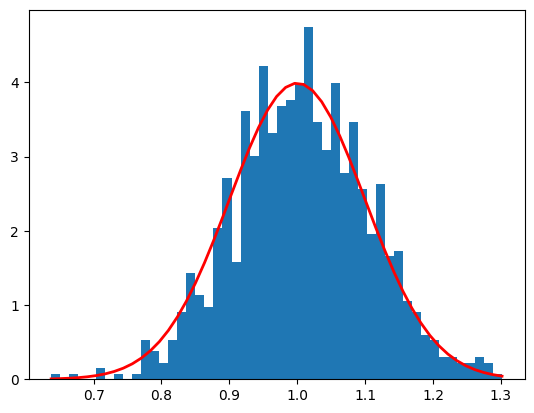

In [8]:
# Random variable, normal distribution
# x = meat consumption from Silpo over the last 1000 days
# y = probability that x meat amount will be bought on a given day

mu, sigma = 1, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

prob, bins, ignored = plt.hist(s, 50, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')
plt.show()

In [9]:
len(s)

1000

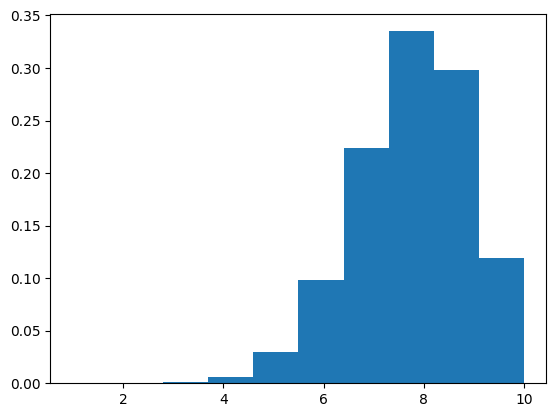

In [11]:
# Random variable, binomial distribiution
# x = number of times we throw heads in 10 coin flips
# y = probability to see x heads

n, p = 10, 0.8 # number of flips, probability of each result in a flip
s = np.random.binomial(n, p, 1000000) # 1000 trials

probs, bins, ignored = plt.hist(s, n, density=True)
plt.show()

In [12]:
prob

array([0.0752645 , 0.        , 0.0752645 , 0.        , 0.        ,
       0.15052901, 0.        , 0.0752645 , 0.        , 0.0752645 ,
       0.52685153, 0.37632252, 0.22579351, 0.52685153, 0.90317404,
       1.43002557, 1.12896756, 0.97843855, 2.0321416 , 2.70952213,
       1.58055458, 3.61269618, 3.01058015, 4.21481221, 3.31163816,
       3.68796068, 3.76322519, 3.9890187 , 4.74166374, 3.46216717,
       3.08584465, 3.9890187 , 2.78478664, 3.46216717, 2.55899313,
       1.9568771 , 2.63425763, 1.65581908, 1.73108359, 1.05370305,
       0.90317404, 0.60211603, 0.52685153, 0.30105801, 0.30105801,
       0.22579351, 0.22579351, 0.30105801, 0.22579351, 0.0752645 ])

In [13]:
# expected value
sum([(i*prob[i]) for i in range(n)])

np.float64(2.107406104906707)

In [14]:
s.mean()

np.float64(7.998445)

In [15]:
np.median(s)

np.float64(8.0)

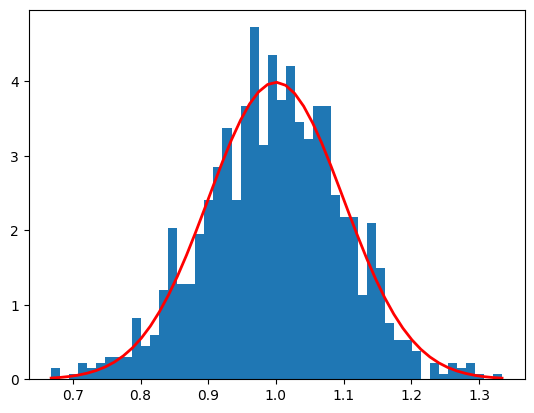

In [16]:
# Random variable, normal distribution - in more detail

# x = meat consumption from Silpo over the last 1000 days
# y = probability that x meat amount will be bought on a given day

mu, sigma = 1, 0.1 # mean and standard deviation
x = np.random.normal(mu, sigma, 1000)

prob, bins, ignored = plt.hist(x, 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')
plt.show()

Probability density formula of **normal (Gaussian) distribution**:

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2}
$$

In [17]:
from scipy.stats import norm

probability_pdf = norm.pdf(0.85, loc=mu, scale=sigma)
print(probability_pdf)

1.2951759566589167


In [18]:
# average (mean)
x.mean()

np.float64(0.9971861876455521)

In [19]:
# variance
np.sum(((x - x.mean())**2)/len(x))

np.float64(0.010442770935219673)

In [20]:
# standard deviation
np.sqrt(np.sum(((x - x.mean())**2)/len(x)))

np.float64(0.10218987687251449)

In [21]:
# standard deviation
np.std(x)

np.float64(0.1021898768725145)

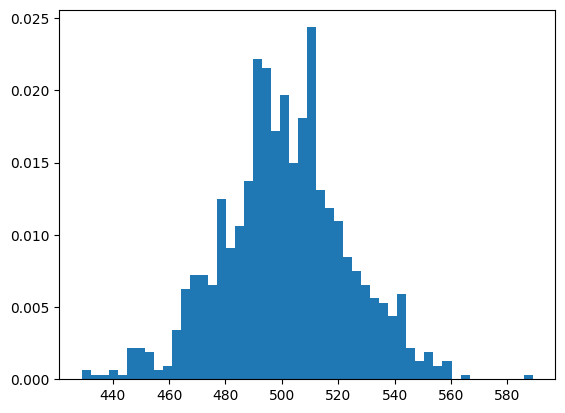

In [25]:
# new variable: z = number of active coupons for discount on meat
# Poisson distribution is a discrete distribution that counts the frequency
# of occurrences as integers, whose list {0, 1, 2, ...} can be infinitive
z = np.random.poisson(500, 1000)
prob, bins, ignored = plt.hist(z, 50, density=True)
plt.show()

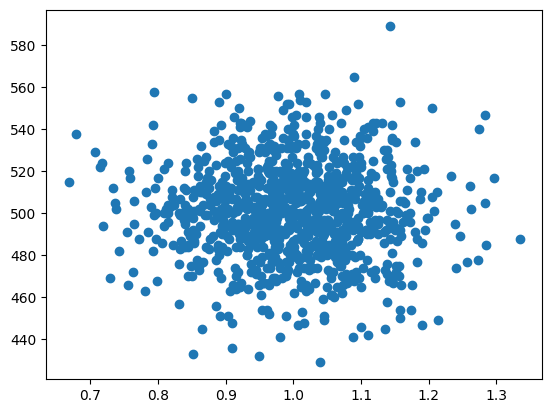

In [26]:
plt.scatter(x, z)

In [27]:
np.cov(x, z)[0][1]
# Note that element C0_1, which shows the covariance between x and z, is negative.

np.float64(-0.03501580985805798)

In [28]:
np.std(x)

np.float64(0.1021898768725145)

In [29]:
np.std(z)

np.float64(22.280053657924615)

In [30]:
np.corrcoef(x, z) # [0][1]

array([[ 1.        , -0.01536404],
       [-0.01536404,  1.        ]])

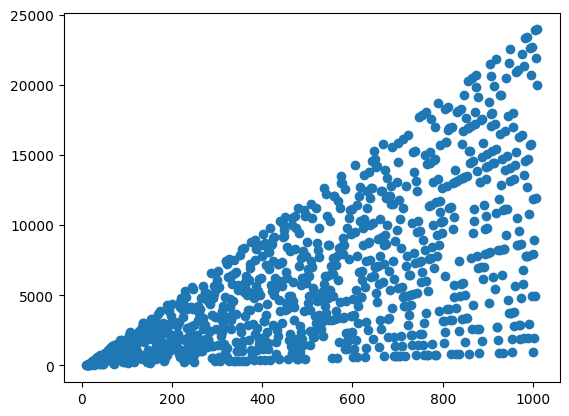

In [31]:
u = np.arange(10, 1010)
j = np.arange(0, 1000)*np.random.randint(1, 25, size=(1000))
plt.scatter(u, j)

In [32]:
np.cov(u, j)[0][1]

np.float64(1036175.6526526528)

In [33]:
np.corrcoef(u, j)[0][1]

np.float64(0.6616802060113578)

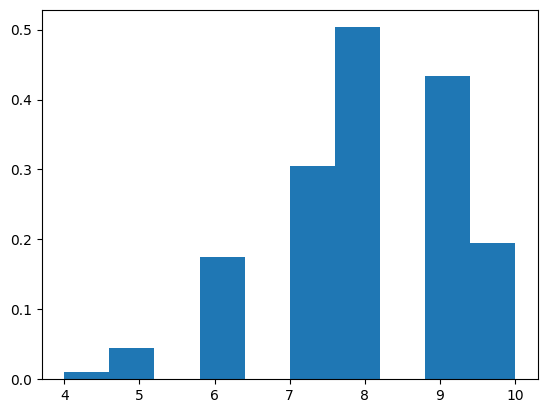

In [35]:
# Central limit theorem

N = 100000000
n = 1000
s = np.random.binomial(10, 0.8, N)
s = s.reshape((N//n, n))

prob, bins, ignored = plt.hist(s[0], 10, density=True)
plt.show()

In [36]:
len(s)

100000

In [37]:
s_means = s.mean(axis=1)
s_means

array([7.996, 8.016, 8.077, ..., 7.929, 7.961, 7.989])

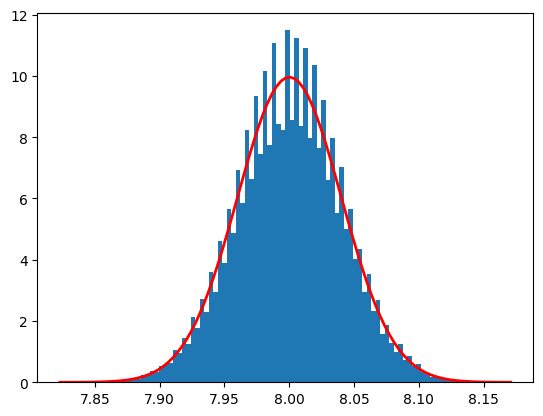

In [38]:
sigma = s_means.std()
mu = s_means.mean()

prob, bins, ignored = plt.hist(s_means, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')
plt.show()

### Pandas
`# intro`

In [39]:
import pandas as pd

mountain_height = pd.Series([2061, 2035.8, 2028.5, 2022.5, 2016.4])

print(mountain_height)

0    2061.0
1    2035.8
2    2028.5
3    2022.5
4    2016.4
dtype: float64


In [40]:
mountains_height = pd.Series(
    data=[2061, 2035.8, 2028.5, 2022.5, 2016.4],
    index=["Goverla", "Brebenskyl", "Pip_Ivan", "Petros", "Gutin_Tomnatik"],
    name="Height, m",
    dtype=float,
)

print(mountains_height)

Goverla           2061.0
Brebenskyl        2035.8
Pip_Ivan          2028.5
Petros            2022.5
Gutin_Tomnatik    2016.4
Name: Height, m, dtype: float64


In [41]:
print(mountains_height.iloc[0]) # 2061.0
print(mountains_height["Goverla"]) # 2061.0
print(mountains_height[["Pip_Ivan", "Goverla", "Gutin_Tomnatik"]])

2061.0
2061.0
Pip_Ivan          2028.5
Goverla           2061.0
Gutin_Tomnatik    2016.4
Name: Height, m, dtype: float64


In [42]:
print(mountains_height[1:3])
print(mountains_height["Brebenskyl":"Petros"])

Brebenskyl    2035.8
Pip_Ivan      2028.5
Name: Height, m, dtype: float64
Brebenskyl    2035.8
Pip_Ivan      2028.5
Petros        2022.5
Name: Height, m, dtype: float64


In [43]:
print(mountains_height.Petros) # 2022.5
print(mountains_height.Brebenskyl) # 2035.8

2022.5
2035.8


In [44]:
print(mountains_height > 2030)
print(mountains_height[mountains_height > 2030])

Goverla            True
Brebenskyl         True
Pip_Ivan          False
Petros            False
Gutin_Tomnatik    False
Name: Height, m, dtype: bool
Goverla       2061.0
Brebenskyl    2035.8
Name: Height, m, dtype: float64


In [45]:
print("Goverla" in mountains_height) # True

True


In [46]:
sort_index = mountains_height.sort_index()
print(sort_index)

Brebenskyl        2035.8
Goverla           2061.0
Gutin_Tomnatik    2016.4
Petros            2022.5
Pip_Ivan          2028.5
Name: Height, m, dtype: float64


In [47]:
mountains_height.sort_values(inplace=True, ascending=False)
mountains_height

Goverla           2061.0
Brebenskyl        2035.8
Pip_Ivan          2028.5
Petros            2022.5
Gutin_Tomnatik    2016.4
Name: Height, m, dtype: float64

In [49]:
mountains_height = pd.Series(
    {"Goverla": 2061, "Brebenskyl": 2035.8, "Pip_Ivan": 2028.5},
    index=["Goverla", "Brebenskyl", "Pip_Ivan", "Petros", "Gutin_Tomnatik"],
    name="Height, m",
    dtype=float,
)

print(mountains_height)
print("")

mountains_height.fillna(0, inplace=True)
print(mountains_height)

Goverla           2061.0
Brebenskyl        2035.8
Pip_Ivan          2028.5
Petros               NaN
Gutin_Tomnatik       NaN
Name: Height, m, dtype: float64

Goverla           2061.0
Brebenskyl        2035.8
Pip_Ivan          2028.5
Petros               0.0
Gutin_Tomnatik       0.0
Name: Height, m, dtype: float64


In [50]:
mountains_height = mountains_height.reset_index(drop=False)

In [51]:
mountains_height

,index,"Height, m"
0,Goverla,2061.0
1,Brebenskyl,2035.8
2,Pip_Ivan,2028.5
3,Petros,0.0
4,Gutin_Tomnatik,0.0


In [52]:
# mountains_height = None

In [53]:
mountains_height.columns = ["Mountain", "Height, m"]
mountains_height

,Mountain,"Height, m"
0,Goverla,2061.0
1,Brebenskyl,2035.8
2,Pip_Ivan,2028.5
3,Petros,0.0
4,Gutin_Tomnatik,0.0


In [54]:
type(mountains_height)

pandas.core.frame.DataFrame

In [56]:
mountains_height.iloc[0]

Mountain     Goverla
Height, m     2061.0
Name: 0, dtype: object

In [57]:
mountains_height.iloc[0, 0]

'Goverla'

In [55]:
mountains_height.loc[0, "Mountain"]

'Goverla'

In [58]:
mountains_height[mountains_height["Height, m"] > 2030]

,Mountain,"Height, m"
0,Goverla,2061.0
1,Brebenskyl,2035.8


In [59]:
mountains_height["Goverla" == mountains_height["Mountain"]]

,Mountain,"Height, m"
0,Goverla,2061.0


In [60]:
# mountains_height.to_csv("mountains_height.csv", index=True)

In [62]:
# mountains_height.to_excel("mountains_height.xlsx", sheet_name="Mounts")
#TODO: check the env. openpyxl should be installed somewhere

### JSON

In [63]:
data = {
    "columns": ["name", "country"],
    "index": [1, 2, 3],
    "data": [
        ["Michael", "Canada"],
        ["John", "USA"],
        ["Liza", "Australia"]
    ]
}

In [64]:
df_d = pd.DataFrame(data["data"], columns=data["columns"], index=data["index"])
df_d

,name,country
1,Michael,Canada
2,John,USA
3,Liza,Australia


In [ ]:
# df_d.to_json("names_countries.json", orient="split") split - format of dictuionary

In [66]:
employees = pd.read_json("names_countries.json", orient="split")
employees

,name,country
1,Michael,Canada
2,John,USA
3,Liza,Australia


In [67]:
data = {
    "name": ["Michael", "John", "Liza"],
    "country": ["Canada", "USA", "Australia"]
}

In [68]:
df_j = pd.DataFrame.from_dict(data)
df_j

,name,country
0,Michael,Canada
1,John,USA
2,Liza,Australia


In [69]:
import os
import json

PATH = "../../data"

with open(os.path.join(PATH, "employees.json"), "w") as file:
    json.dump(data, file)

In [70]:
pd.read_json(os.path.join(PATH, "employees.json"), orient=None)

,name,country
0,Michael,Canada
1,John,USA
2,Liza,Australia


In [ ]:
new_employee = pd.DataFrame.from_dict({"name": ["John"], "country": ["Denmark"]})
print(new_employee)
# df_j.append(new_employee, ignore_index=True) - there is no .append anymore
new_df = pd.concat([df_j, new_employee])
new_df

   name  country
0  John  Denmark


,name,country
0,Michael,Canada
1,John,USA
2,Liza,Australia
0,John,Denmark


In [72]:
new_df = new_df.reset_index(drop=True)
new_df

,name,country
0,Michael,Canada
1,John,USA
2,Liza,Australia
3,John,Denmark


### HTML

In [2]:
tmp = pd.read_html("https://statisticstimes.com/tech/top-computer-languages.php", attrs={"id": "table_id1"})
print(tmp[0].head())

   Mar 2025 Change Programming language    Share  Trends
0         1    NaN               Python  30.27 %  +1.8 %
1         2    NaN                 Java  14.89 %  -0.9 %
2         3    NaN           JavaScript   7.78 %  -0.9 %
3         4      ↑                C/C++   7.12 %  +0.6 %
4         5      ↓                   C#   6.11 %  -0.6 %


### CSV

We will use the Kaggle Titanic data to demonstrate these major steps.

- Data: https://www.kaggle.com/competitions/titanic/data
- Examples used to compose this notebook: https://www.kaggle.com/code/startupsci/titanic-data-science-solutions,
https://www.kaggle.com/code/abhishekmamidi/titanic-data-preprocessing-and-visualization/notebook
I

In [3]:
# import data from Kaggle Titanic Competition
PATH = "" # train and test files are in this folder
train_data = pd.read_csv(os.path.join(PATH, "train.csv"), index_col=0)
test_data = pd.read_csv(os.path.join(PATH, "test.csv"), index_col=0)

train_data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


What we can do in order to clean data:
- Remove duplicates
- Handle the NaN values (remove or impute)
- Transform categoric values into numeric values (e.g. one-hot-encoding, label encoding)
- Normalize data

#### Remove duplicates

In [5]:
# Identify duplicates

len(train_data["Name"].unique()) == len(train_data)

True

In [6]:
len(test_data["Name"].unique()) == len(test_data)

True

In [7]:
# concatenate (manually create duplicates)
df_full = pd.concat([train_data.reset_index(drop=False), test_data.reset_index(drop=False)]).reset_index(drop=True)
len(df_full["Name"].unique()) == len(df_full)

False

In [8]:
len(df_full["Name"].unique())

1307

In [9]:
len(df_full) # there 2 duplicates

1309

In [10]:
df_full[df_full["Name"].duplicated(keep=False)]
# keep=first means when duplicate appears first time
# keep=last means when duplicate appears last time

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [11]:
df_full[df_full["Ticket"].duplicated(keep=False)].sort_values(by=["Ticket"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1.0,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.500,B77,S
504,505,1.0,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,B79,S
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,B77,S
558,559,1.0,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.650,E67,S
262,263,0.0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.650,E67,S
...,...,...,...,...,...,...,...,...,...,...,...,...
736,737,0.0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,NaN,S
905,906,NaN,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.175,E31,S
92,93,0.0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.175,E31,S
540,541,1.0,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.000,B22,S


In [12]:
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
df_without_duplicates = df_full.drop_duplicates(keep="first")
len(df_without_duplicates)

1309

### Handle the NaN values

In [13]:
# Train data
column_names = train_data.columns
print("***Empty value counts***")
for column in column_names:
    nan_values = train_data[column].isnull().sum()
    if nan_values > 0:
        print(f"{column}: {nan_values}")

***Empty value counts***
Age: 177
Cabin: 687
Embarked: 2


In [14]:
train_data[train_data["Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [15]:
print(f"Before: {len(train_data[train_data["Age"].isnull()])=}")
mean_age = train_data["Age"].mean()
print(f"{mean_age=}")
# train_data["Age"].fillna(value=mean_age, inplace=True) # will not work from pandas 3.0. Do next:
train_data.fillna({"Age":mean_age}, inplace=True)
print(f"After: {len(train_data[train_data["Age"].isnull()])=}")

Before: len(train_data[train_data["Age"].isnull()])=177
mean_age=np.float64(29.69911764705882)
After: len(train_data[train_data["Age"].isnull()])=0


In [16]:
# remove columns with embarked empty
print(f"Before: {len(train_data)}")
train_data.dropna(subset=["Embarked"], inplace=True)
train_data[train_data["Embarked"].isnull()]
print(f"After: {len(train_data)}")

Before: 891
After: 889


In [17]:
# drop the whole column
train_data = train_data.drop(["Cabin"], axis=1)

In [18]:
train_data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


### Explore

In [19]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
train_data[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


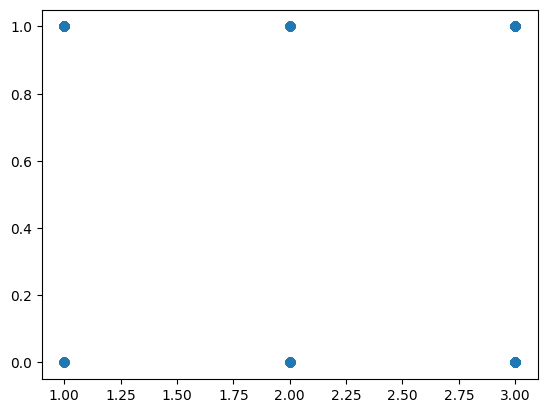

In [21]:
train_data_pclass = train_data["Pclass"].to_numpy() # series to numpy
train_data_survived = train_data["Survived"].to_numpy()

plt.scatter(train_data_pclass, train_data_survived)

In [22]:
print(f"Covariance: {np.cov(train_data_pclass, train_data_survived)[0][1]}")
print(f"Correlation: {np.corrcoef(train_data_pclass, train_data_survived)[0][1]}")

Covariance: -0.13619285764955052
Correlation: -0.3355488593568267


In [23]:
train_data[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.740385
1,male,0.188908


In [24]:
train_data_sex = train_data["Sex"].to_numpy()
train_data_sex_factorized = pd.factorize(train_data_sex)[0]
train_data_sex_factorized

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,

In [25]:
print(f"Covariance: {np.cov(train_data_sex_factorized, train_data_survived)[0][1]}")
print(f"Correlation: {np.corrcoef(train_data_sex_factorized, train_data_survived)[0][1]}")

Covariance: 0.12576004013011866
Correlation: 0.5415849155511686


In [ ]:
train_data_age = train_data["Age"].to_numpy()

print(f"Covariance: {np.cov(train_data_age, train_data_survived)[0][1]}")
print(f"Correlation: {np.corrcoef(train_data_age, train_data_survived)[0][1]}")

### Time Series

In [ ]:
date = pd.Timestamp("2021-09-10")

print(date) #

In [ ]:
date = pd.to_datetime("2021-09-10 2:54:13")
print(date)

In [ ]:
date = pd.date_range(start="2021-09-01", freq="D", periods=8)

temperature = pd.Series([23, 17, 17, 16, 15, 14, 17, 20], index=date)

print(temperature)

In [ ]:
date = pd.date_range(start="2021-09-01", freq="D", periods=8)